In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [83]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==1]
df.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
0,2017-01-04 00:00:00,2452.453706,947.170207,0.450666,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
1,2017-01-04 01:00:00,2722.733293,1142.593908,1.377337,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
2,2017-01-04 02:00:00,2875.868294,1325.265793,3.915958,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
3,2017-01-04 03:00:00,2803.582630,1279.729428,0.084493,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
4,2017-01-04 04:00:00,2465.531768,922.310425,0.155445,1,1,0,3931.024433,3778.895815,0,0,0,0,0,1,0


In [84]:
df=df.drop(columns=['main_meter','sub_meter_2','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_1
timestamp,
2017-01-04 00:00:00,947.170207
2017-01-04 01:00:00,1142.593908
2017-01-04 02:00:00,1325.265793
2017-01-04 03:00:00,1279.729428
2017-01-04 04:00:00,922.310425


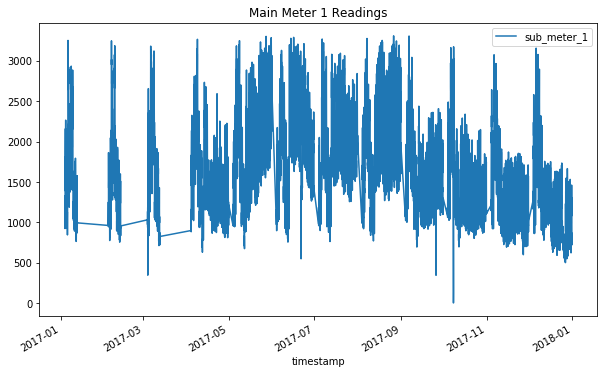

In [85]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

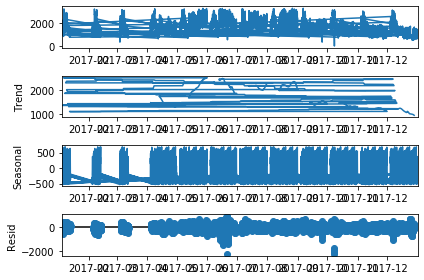

In [86]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [87]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1); AIC=92113.917, BIC=92141.097, Fit time=1.046 seconds
Fit ARIMA: order=(0, 0, 0); AIC=103463.285, BIC=103476.874, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=92135.163, BIC=92155.548, Fit time=0.094 seconds
Fit ARIMA: order=(0, 0, 1); AIC=98499.685, BIC=98520.069, Fit time=0.088 seconds
Fit ARIMA: order=(2, 0, 1); AIC=92072.579, BIC=92106.553, Fit time=1.128 seconds
Fit ARIMA: order=(2, 0, 0); AIC=92123.124, BIC=92150.303, Fit time=0.576 seconds
Fit ARIMA: order=(2, 0, 2); AIC=92014.390, BIC=92055.159, Fit time=1.165 seconds
Fit ARIMA: order=(3, 0, 3); AIC=89037.060, BIC=89091.419, Fit time=8.035 seconds
Fit ARIMA: order=(2, 0, 3); AIC=90399.525, BIC=90447.089, Fit time=2.199 seconds
Fit ARIMA: order=(4, 0, 3); AIC=87339.237, BIC=87400.390, Fit time=12.106 seconds
Fit ARIMA: order=(4, 0, 2); AIC=89422.698, BIC=89477.056, Fit time=1.692 seconds
Fit ARIMA: order=(4, 0, 4); AIC=86969.044, BIC=87036.992, Fit time=16.182 seconds
Fit ARIMA: order=(5, 0, 

In [88]:
train = df.loc['01-04-2017 00:00:00':'7-11-2017 00:00:00']
test = df.loc['7-11-2017 00:00:00']
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 0, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [90]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast,

(array([ 881.2677107 ,  972.6056251 , 1190.37341432, ..., 1821.03687127,
        1824.53996652, 1816.7679864 ]),)

In [91]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb1m1.csv')

In [98]:
df7=pd.read_csv('C:/Users/Ankan/Downloads/updatedb1m2.csv')

In [99]:
df7.head()

,Unnamed: 0,0
0,0,844.654823
1,1,874.764769
2,2,1026.271245
3,3,932.539370
4,4,847.415782


In [100]:
ne=np.repeat(df7['0'],4)
ne.to_csv('latest_train_b1m1.csv')